# Training A Food Classifier

## Load And Prepare Data

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

In [22]:
import os
import shutil

In [47]:
# Getting The Current File Location
print(os.getcwd())

C:\Users\Niv Doshi\Desktop\Jupyter\Hackathon\RiceDiseaseDataset\train\BrownSpot


In [52]:
# Changing Directory To The Required One
os.chdir('C:\\Users\\Niv Doshi\\Desktop\\Jupyter\\Hackathon\\RiceDiseaseDataset')

In [53]:
os.listdir()

['train', 'validation']

In [64]:
TrainDir = 'C:\\Users\\Niv Doshi\\Desktop\\Jupyter\\Hackathon\\RiceDiseaseDataset\\train'
os.chdir(TrainDir)

# Universal Approximation

## Checking Image

In [55]:
# Dividing The Rice Into Four Different Parts
Label1 = 'BrownSpot'
Label2 = 'Healthy'
Label3 = 'Hispa'
Label4 = 'LeafBlast'

# Preperation Some Data
##Next gonna do preperation to make the data handling easier. It's not important that you understand the following code snippet completly.
##W e're just doing two things:
### 1.labelA Removing all images that don't have or labelB
### 2.Renaming images with labelA or labelB to have that label in their filename

In [65]:
# Loop Thorugh All Images Downlaoded
print(os.listdir())

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [79]:
# Renaming For Proper Use
TrainDir = 'C:\\Users\\Niv Doshi\\Desktop\\Jupyter\\Hackathon\\RiceDiseaseDataset\\train'
os.chdir(TrainDir)

for folderPath in os.listdir():
    os.chdir(f'{TrainDir}\\{folderPath}')
    for img in os.listdir():
        CurrentName = os.path.join(os.getcwd(),img)
        NewName = os.path.join(os.getcwd(),f'{folderPath}_{img}')
        os.rename(CurrentName,NewName)
    os.chdir(TrainDir)

In [93]:
# Moving All Files To A Single Folder
os.mkdir('AllImages')
AllImagesDir = 'C:\\Users\\Niv Doshi\\Desktop\\Jupyter\\Hackathon\\RiceDiseaseDataset\\train\\AllImages'

In [89]:
TrainDir = 'C:\\Users\\Niv Doshi\\Desktop\\Jupyter\\Hackathon\\RiceDiseaseDataset\\train'
os.chdir(TrainDir)

for folderPath in os.listdir():
    os.chdir(f'{TrainDir}\\{folderPath}')
    for img in os.listdir():
        CurrentPath = os.path.join(os.getcwd(),img)
        NewPath = os.path.join(f'{TrainDir}\\AllImages',img)
        shutil.copy(CurrentPath,NewPath)
    os.chdir(TrainDir)

## Training Model

In [90]:
def GetLabel(fileName):
  return fileName.split('_')[0]

In [91]:
GetLabel("ABC_123")

'ABC'

In [95]:
dls = ImageDataLoaders.from_name_func(
  AllImagesDir, get_image_files(AllImagesDir), valid_pct=0.2, seed=420,
  label_func=GetLabel, item_tfms=Resize(224))

#PCT --> For Validation

In [122]:
dls

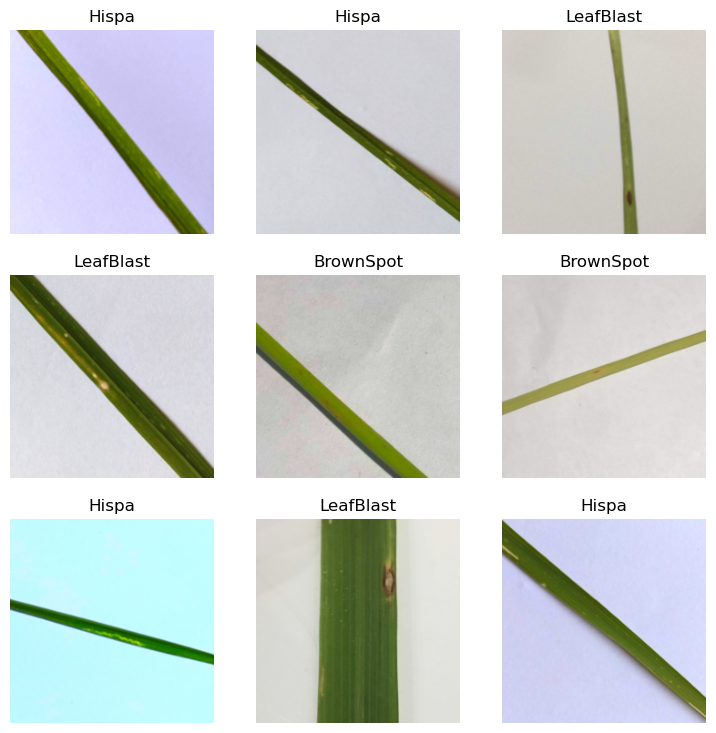

In [96]:
dls.valid. show_batch()

In [103]:
learn = cnn_learner (dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,2.099204,1.374165,0.500000,06:10


epoch,train_loss,valid_loss,error_rate,time
0,1.379058,1.148283,0.437500,07:00


# Verify Model

## Upload An Image

In [146]:
with open("C:\\Users\\Niv Doshi\\Desktop\\Pest.png",'r',errors='ignore') as img:  
    image = img.read()
    image = PILImage.create('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')
    image = Resize(224)(image)  # Resize the image to 224x224 pixels
    image = ToTensor()(image)    # Convert the image to a PyTorch tensor
    print(image.view())
    
    

TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (torch.dtype dtype)
 * (tuple of ints size)


In [137]:
with open("C:\\Users\\Niv Doshi\\Desktop\\Pest.png",'r',errors='ignore') as img:  
    image = img.read()
    
    image = PILImage.create('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')
    image = Resize(224)(image)  # Resize the image to 224x224 pixels
    image = ToTensor()(image)    # Convert the image to a PyTorch tensor
    image = image.unsqueeze(0)
    label,_,probs = learn.predict(image)
    print (f"This is a {label}")

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 4 is not equal to len(dims) = 3

In [129]:
from PIL import Image
from IPython.display import display
import torchvision.transforms as transforms
import torch

image = Image.open('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')

transform = transforms.Compose([
    transforms.Resize((224,244)),
    transforms.ToTensor()
])

image = transform(image)

label,_,probs = learn.predict(image)
print (f"This is a {label}")

TypeError: Cannot handle this data type: (1, 1, 244), <f4

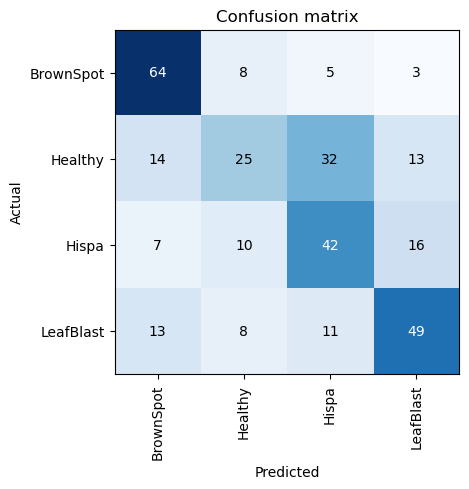

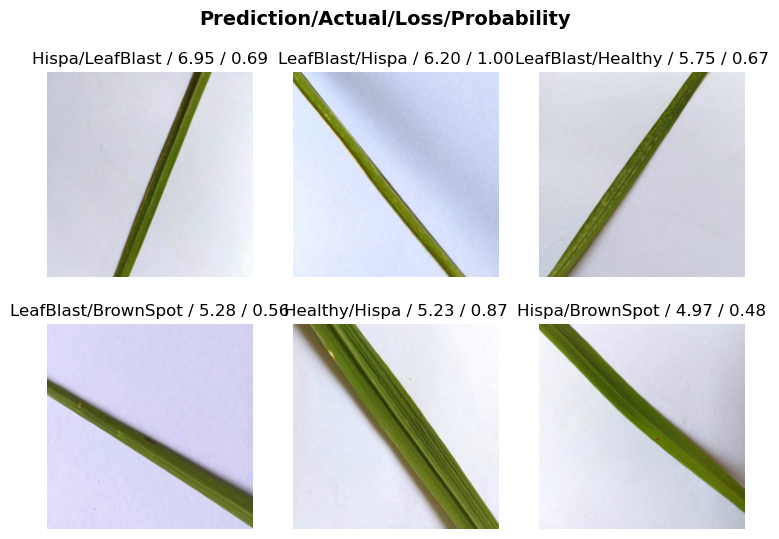

In [127]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses (6)

In [157]:
image = PILImage.create('C:\\Users\\Niv Doshi\\Desktop\\Pest.png')
image = Resize((224,224))(image)  # Resize the image to 224x224 pixels
image = ToTensor()(image)    # Convert the image to a PyTorch tensor
image = image.unsqueeze(0)
len(image)

1